In [5]:
import mplfinance as mpf
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [9]:
df = yf.download("^GSPC", start = "2022-12-31")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000
...,...,...,...,...,...,...
2023-07-24,4543.390137,4563.410156,4541.290039,4554.640137,4554.640137,3856250000
2023-07-25,4555.189941,4580.620117,4552.419922,4567.459961,4567.459961,3812470000
2023-07-26,4558.959961,4582.470215,4547.580078,4566.750000,4566.750000,3990290000


In [20]:
df.Low.rolling(5, center = True).min()

Date
2023-01-03            NaN
2023-01-04            NaN
2023-01-05    3794.330078
2023-01-06    3802.419922
2023-01-09    3802.419922
                 ...     
2023-07-24    4527.560059
2023-07-25    4528.560059
2023-07-26    4528.560059
2023-07-27            NaN
2023-07-28            NaN
Name: Low, Length: 143, dtype: float64

In [40]:
# This is a boolean which checks which Low values of the df column are the equal to the minimum among the five days.
df.Low == df.Low.rolling(5, center = True).min()


Date
2023-01-03    False
2023-01-04    False
2023-01-05    False
2023-01-06    False
2023-01-09    False
              ...  
2023-07-24    False
2023-07-25    False
2023-07-26    False
2023-07-27    False
2023-07-28    False
Name: Low, Length: 143, dtype: bool

In [22]:
# Using df[df.Low == df.Low.rolling(5, center = True).min()] will select the whole dataframe, but we only want the "Low" column.
# We use .Low to select the 'Low' column from the filtered DataFrame.
df[df.Low == df.Low.rolling(5, center = True).min()].Low


Date
2023-01-19    3885.540039
2023-01-25    3949.060059
2023-02-10    4060.790039
2023-02-24    3943.080078
2023-03-02    3928.159912
2023-03-13    3808.860107
2023-03-24    3909.159912
2023-04-06    4069.840088
2023-04-26    4049.350098
2023-05-04    4048.280029
2023-05-10    4098.919922
2023-05-24    4103.979980
2023-06-08    4261.069824
2023-06-26    4328.080078
2023-07-06    4385.049805
Name: Low, dtype: float64

In [43]:
# Let us store the above code as our Support line:
Support = df[df.Low == df.Low.rolling(5, center = True).min()].Low
Support

Date
2023-01-19    3885.540039
2023-01-25    3949.060059
2023-02-10    4060.790039
2023-02-24    3943.080078
2023-03-02    3928.159912
2023-03-13    3808.860107
2023-03-24    3909.159912
2023-04-06    4069.840088
2023-04-26    4049.350098
2023-05-04    4048.280029
2023-05-10    4098.919922
2023-05-24    4103.979980
2023-06-08    4261.069824
2023-06-26    4328.080078
2023-07-06    4385.049805
Name: Low, dtype: float64

In [44]:
# We can repeat the above code for our Resistance Line:
Resistance = df[df.High == df.High.rolling(5, center = True).max()].High
Resistance

Date
2023-01-17    4015.389893
2023-01-23    4039.310059
2023-01-27    4094.209961
2023-02-02    4195.439941
2023-02-14    4159.770020
2023-03-06    4078.489990
2023-03-16    3964.459961
2023-03-22    4039.489990
2023-04-04    4133.129883
2023-04-18    4169.479980
2023-05-01    4186.919922
2023-05-10    4154.279785
2023-05-19    4212.910156
2023-06-05    4299.279785
2023-06-16    4448.470215
2023-06-30    4458.479980
2023-07-19    4578.430176
Name: High, dtype: float64

In [65]:
levels = pd.concat([Support, Resistance]) # This combines the two pandas Series (or DataFrames) Support and Resistance into one Series (or DataFrame) called levels.
levels

Date
2023-01-19    3885.540039
2023-01-25    3949.060059
2023-02-10    4060.790039
2023-02-24    3943.080078
2023-03-02    3928.159912
2023-03-13    3808.860107
2023-03-24    3909.159912
2023-04-06    4069.840088
2023-04-26    4049.350098
2023-05-04    4048.280029
2023-05-10    4098.919922
2023-05-24    4103.979980
2023-06-08    4261.069824
2023-06-26    4328.080078
2023-07-06    4385.049805
2023-01-17    4015.389893
2023-01-23    4039.310059
2023-01-27    4094.209961
2023-02-02    4195.439941
2023-02-14    4159.770020
2023-03-06    4078.489990
2023-03-16    3964.459961
2023-03-22    4039.489990
2023-04-04    4133.129883
2023-04-18    4169.479980
2023-05-01    4186.919922
2023-05-10    4154.279785
2023-05-19    4212.910156
2023-06-05    4299.279785
2023-06-16    4448.470215
2023-06-30    4458.479980
2023-07-19    4578.430176
dtype: float64

## Filtering the Support and Resistance (Because there's too many)

In [56]:
levels.diff() # This calculates the difference between levels.
abs(levels.diff()) # Calculating the absolute difference between levels.

Date
2023-01-19           NaN
2023-01-25     63.520020
2023-02-10    111.729980
2023-02-24    117.709961
2023-03-02     14.920166
2023-03-13    119.299805
2023-03-24    100.299805
2023-04-06    160.680176
2023-04-26     20.489990
2023-05-04      1.070068
2023-05-10     50.639893
2023-05-24      5.060059
2023-06-08    157.089844
2023-06-26     67.010254
2023-07-06     56.969727
2023-01-17    369.659912
2023-01-23     23.920166
2023-01-27     54.899902
2023-02-02    101.229980
2023-02-14     35.669922
2023-03-06     81.280029
2023-03-16    114.030029
2023-03-22     75.030029
2023-04-04     93.639893
2023-04-18     36.350098
2023-05-01     17.439941
2023-05-10     32.640137
2023-05-19     58.630371
2023-06-05     86.369629
2023-06-16    149.190430
2023-06-30     10.009766
2023-07-19    119.950195
dtype: float64

In [70]:
# This filters out levels to include those points where the absolute difference between levels is 100.
# WThe value of 100 is chosen as a threshold to focus on more significant daily changes in the S&P 500 index, filtering out minor fluctuations. This threshold is determined based on what I have judged on what constitutes a significant daily change.
levels = levels[abs(levels.diff()) > 100]

## Plotting our chart using mplfinance

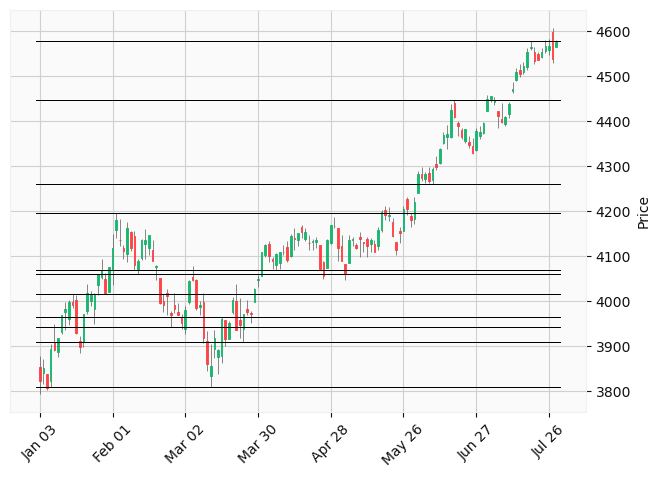

In [71]:
mpf.plot(df, 
         type="candle", 
         hlines=dict(hlines = levels.to_list(), linewidths = 0.5, colors = "black"), # We need a dictionary as there are multiple inputs to hline.
         style="yahoo")

# There is one problem with this plot, which is that there are too many lines. We can use a filter to improve this. We shall do it in the cell above.

## Plotting our chart using matplotlib

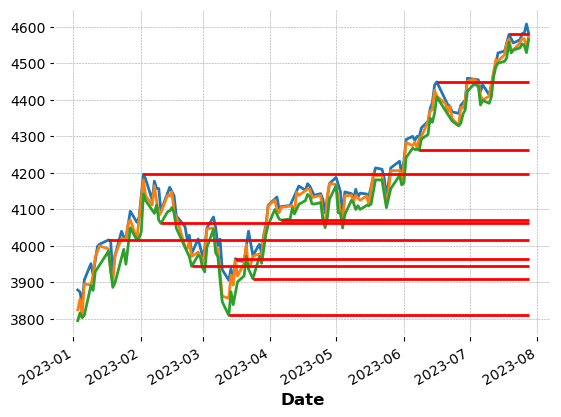

In [64]:
df.High.plot() # This plots the daily highest price.
df.Close.plot() # This plots the daily closing price.
df.Low.plot() # This plots the daily lowest price.
plt.hlines(levels, xmin = levels.index, xmax=df.index[-1], colors = "red") # hlines are horizontal lines. df.index[-1] means that all lines will end at the last index position in the DataFrame df.
# xmin: This sets the starting point of the lines on the x-axis. xmax: This sets the ending point of the lines on the x-axis. 